## Ashim Sedhain
## MSCS-634-B01: Advanced Big Data and Data Mining
## Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np

sk_wine = load_wine()

df = pd.DataFrame(sk_wine.data, columns=sk_wine.feature_names)
df['target'] = sk_wine.target

print("Shape of the dataset:", df.shape)
print("\nFeature names:", sk_wine.feature_names)
print("\nTarget classes:", sk_wine.target_names)

print("\nClass distribution:")
print(df['target'].value_counts())

Shape of the dataset: (178, 14)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target classes: ['class_0' 'class_1' 'class_2']

Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('target', axis=1))

In [5]:
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

In [6]:
# Implement K-Means with k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluate K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(df['target'], kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.4f}")

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78da56e0ca40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/ctypes/__init__.py", line 379, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error


K-Means Silhouette Score: 0.2849
K-Means Adjusted Rand Index (ARI): 0.8975


In [7]:
# Implement K-Medoids with k = 3
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluate K-Medoids
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(df['target'], kmedoids_labels)

print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.4f}")
print(f"K-Medoids Adjusted Rand Index (ARI): {kmedoids_ari:.4f}")

K-Medoids Silhouette Score: 0.2676
K-Medoids Adjusted Rand Index (ARI): 0.7411


In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

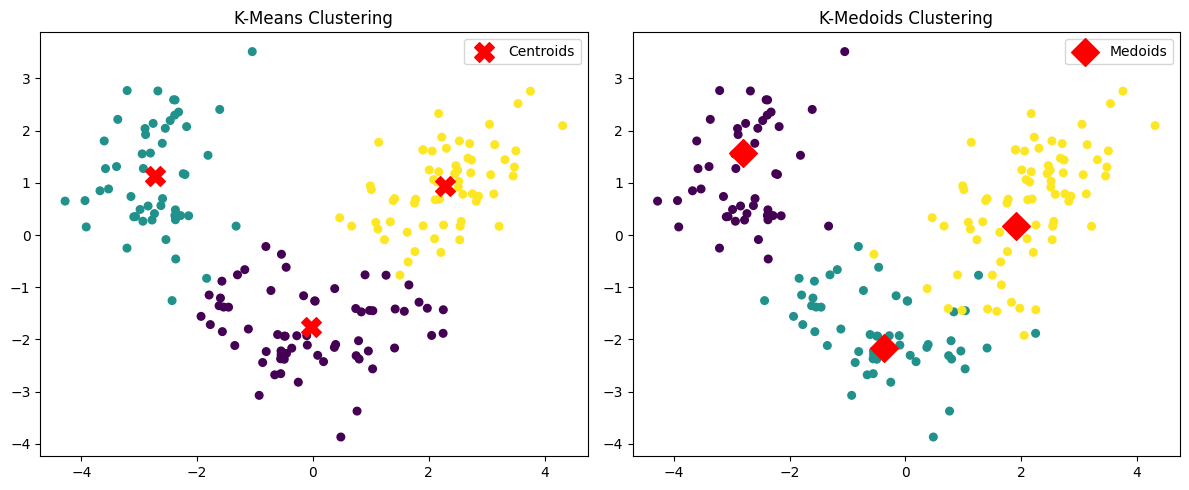

In [9]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot K-Means Clusters
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0],
            pca.transform(kmeans.cluster_centers_)[:,1],
            c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.legend()

# Plot K-Medoids Clusters
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmedoids_labels, cmap='viridis', s=30)
plt.scatter(X_pca[kmedoids.medoid_indices_, 0],
            X_pca[kmedoids.medoid_indices_, 1],
            c='red', marker='D', s=200, label='Medoids')
plt.title("K-Medoids Clustering")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
results = pd.DataFrame({
    'Model': ['K-Means', 'K-Medoids'],
    'Silhouette Score': [kmeans_silhouette, kmedoids_silhouette],
    'Adjusted Rand Index': [kmeans_ari, kmedoids_ari]
})

results

,Model,Silhouette Score,Adjusted Rand Index
0,K-Means,0.284859,0.897495
1,K-Medoids,0.267622,0.741137
